# Spotify 2023 Analysis Project

This project focuses on analyzing the **Spotify 2023 dataset**, which contains the most popular tracks of the year along with their corresponding metadata and audio features. The primary goals of this project are:

- **Data Preparation and Cleaning**: ensuring the dataset is consistent, reliable, and free from irrelevant variables.  
- **Exploratory Data Analysis (EDA)**: uncovering key trends such as the dominance of top artists, collaboration vs solo tracks, and the role of audio features in popularity.  
- **Visualization**: building clear and structured plots to support insights and storytelling.  
- **Predictive Modeling**: applying machine learning models (Linear Regression and Random Forest Regressor) to estimate whether audio features can explain or predict track popularity.  
- **Insights and Storytelling**: interpreting findings to highlight what drives success on Spotify in 2023.  

By combining exploratory analysis with predictive modeling, the project not only demonstrates **technical competency** in data science workflows but also provides meaningful insights into modern music consumption patterns.

---

### Library Imports and Environment Setup

In this initial step, all necessary libraries are imported to facilitate the subsequent stages of the project:

- **pandas**: For data manipulation and analysis, including reading CSV files and handling DataFrames.  
- **plotly.express**: For interactive and high-quality visualizations that support exploration and storytelling.  
- **matplotlib.pyplot**: For additional plotting capabilities, particularly for customized charts.  
- **numpy**: For numerical operations, including transformations and calculations needed for data preprocessing and modeling.  
- **scikit-learn modules**:  
  - `train_test_split`: To split datasets into training and testing subsets for model evaluation.  
  - `StandardScaler`: To normalize feature data for machine learning algorithms.  
  - `RandomForestRegressor` and `LinearRegression`: The predictive models used to estimate track popularity.  
  - `mean_squared_error` and `r2_score`: Metrics to evaluate the performance of the predictive models.  

This step establishes the computational environment and ensures that all subsequent operations can be executed efficiently and accurately.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### Data Loading

In this cell, the Spotify dataset for 2023 is loaded into a pandas DataFrame:

- The CSV file `"spotify-2023.csv"` contains detailed information about tracks, including streams, audio features, release dates, and artist information.  
- Loading the dataset into `df_spotify` allows for structured data manipulation, exploration, and preparation for both visualization and machine learning.  

This is the foundational step where the raw data becomes accessible for analysis.

In [2]:
df_spotify = pd.read_csv("spotify-2023.csv", encoding="latin1")
df_spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Inspecting Column Names

This cell examines the structure of the dataset by listing all column names:

- It reveals all attributes available in the dataset, including track metadata (`track_name`, `artist(s)_name`, `released_year`, etc.), streaming metrics (`streams`), audio features (`danceability_%`, `valence_%`, `energy_%`, `acousticness_%`, etc.), and playlist/chart presence across different platforms.  
- Understanding the column names is essential for data cleaning, feature selection, and ensuring that subsequent operations reference the correct fields.  
- This step provides clarity on the raw structure before any transformation or renaming.


In [3]:
df_spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### Column Renaming for Readability

This cell improves the readability and presentation of the dataset by modifying column names:

1. **Underscore Replacement**: Replaces underscores (`_`) with spaces for clearer formatting.  
   - Example: `artist(s)_name` → `artist(s) name`.

2. **Title Case Conversion**: Converts all column names to title case (capitalizing each word).  
   - Example: `released_year` → `Released Year`.

These transformations make the dataset cleaner and more professional, particularly when visualizing or presenting results.


In [4]:
df_spotify.columns = df_spotify.columns.str.replace("_", " ")
df_spotify.columns = df_spotify.columns.str.title()
df_spotify.columns

Index(['Track Name', 'Artist(S) Name', 'Artist Count', 'Released Year',
       'Released Month', 'Released Day', 'In Spotify Playlists',
       'In Spotify Charts', 'Streams', 'In Apple Playlists', 'In Apple Charts',
       'In Deezer Playlists', 'In Deezer Charts', 'In Shazam Charts', 'Bpm',
       'Key', 'Mode', 'Danceability %', 'Valence %', 'Energy %',
       'Acousticness %', 'Instrumentalness %', 'Liveness %', 'Speechiness %'],
      dtype='object')

### Handling Missing Data and Platform Focus

This cell inspects the dataset for missing values, revealing that certain columns, particularly those related to other platforms like Shazam, Deezer, and Apple Music, contain significant null entries:

- **Key** has 95 missing values.
- **In Shazam Charts** has 50 missing values.
- Other columns related to Spotify (`Streams`, `In Spotify Charts`, `In Spotify Playlists`) have no missing values.

Since the analysis focuses solely on Spotify, columns related to other platforms can be safely ignored or removed. This ensures that the dataset is clean and relevant for subsequent analysis and visualization.

In [5]:
df_spotify.isnull().sum().sort_values(ascending=False)

Key                     95
In Shazam Charts        50
Track Name               0
Artist(S) Name           0
Liveness %               0
Instrumentalness %       0
Acousticness %           0
Energy %                 0
Valence %                0
Danceability %           0
Mode                     0
Bpm                      0
In Deezer Charts         0
In Deezer Playlists      0
In Apple Charts          0
In Apple Playlists       0
Streams                  0
In Spotify Charts        0
In Spotify Playlists     0
Released Day             0
Released Month           0
Released Year            0
Artist Count             0
Speechiness %            0
dtype: int64

### Dropping Irrelevant and Redundant Columns

In this step, columns that are either irrelevant to the current Spotify-focused analysis or not necessary for the core audio feature exploration are removed. These include:

- **Platform-specific columns** for Apple, Deezer, Shazam, and some Spotify indicators.
- **Musical attributes** such as `Bpm`, `Mode`, `Instrumentalness %`, `Liveness %`, and `Speechiness %`.

This reduces noise in the dataset, simplifies analysis, and ensures that only meaningful features related to Spotify streams and key audio characteristics remain for further processing.

In [6]:
df_spotify.drop(["Mode", "Key", 'In Spotify Playlists',
                 'In Spotify Charts', 'In Apple Playlists', 'In Apple Charts',
                 'In Deezer Playlists', 'In Deezer Charts', 'In Shazam Charts',
                 'Bpm', 'Instrumentalness %', 'Liveness %', 'Speechiness %'], axis=1, inplace=True)

### Checking for Missing Values After Cleaning

After dropping irrelevant columns, we re-evaluate the dataset for missing values. 

All remaining columns now have **no missing values**, which confirms that the dataset is clean and ready for further analysis, including feature engineering, visualization, and modeling.


In [7]:
df_spotify.isnull().sum().sort_values(ascending=False)

Track Name        0
Artist(S) Name    0
Artist Count      0
Released Year     0
Released Month    0
Released Day      0
Streams           0
Danceability %    0
Valence %         0
Energy %          0
Acousticness %    0
dtype: int64

### Data Types Inspection

We inspect the data types to ensure each column is in the correct format for analysis.

- `Track Name` and `Artist(S) Name` are categorical/object types.
- `Streams` is still an object because it contains commas; it needs to be converted to numeric for quantitative analysis.
- All audio features (`Danceability %`, `Valence %`, `Energy %`, `Acousticness %`) are correctly stored as integers.
- Date components (`Released Year`, `Released Month`, `Released Day`) are integers, ready for date processing.

This step ensures proper data type handling before any transformations or modeling.

In [8]:
df_spotify.dtypes

Track Name        object
Artist(S) Name    object
Artist Count       int64
Released Year      int64
Released Month     int64
Released Day       int64
Streams           object
Danceability %     int64
Valence %          int64
Energy %           int64
Acousticness %     int64
dtype: object

### Streams Column Cleaning and Conversion

In this step, we clean and convert the `Streams` column to a numeric format:

1. Remove any rows where `Streams` cannot be converted to a number.
2. Strip commas from the `Streams` strings.
3. Convert the cleaned strings to `int64` for numerical analysis.

This transformation ensures that the `Streams` column is ready for calculations, visualizations, and machine learning models.

In [9]:
df_spotify = df_spotify[pd.to_numeric(df_spotify["Streams"].str.replace(",", ""), errors="coerce").notna()]
df_spotify["Streams"] = df_spotify["Streams"].str.replace(",", "").astype("int64")

C:\Users\Mazen\AppData\Local\Temp\ipykernel_6948\131622034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spotify["Streams"] = df_spotify["Streams"].str.replace(",", "").astype("int64")


### Data Types Verification

After cleaning, we verify the data types to ensure all columns are in their appropriate formats:

- `Streams` is now an integer (`int64`), suitable for numerical analysis.
- Audio features (`Danceability %`, `Valence %`, `Energy %`, `Acousticness %`) are integers.
- Track identifiers (`Track Name`, `Artist(S) Name`) remain as objects (strings).
- Release date components (`Released Year`, `Released Month`, `Released Day`) are integers, ready for datetime conversion.

This step confirms that the dataset is properly structured for subsequent analysis and modeling.

In [10]:
df_spotify.dtypes

Track Name        object
Artist(S) Name    object
Artist Count       int64
Released Year      int64
Released Month     int64
Released Day       int64
Streams            int64
Danceability %     int64
Valence %          int64
Energy %           int64
Acousticness %     int64
dtype: object

### Duplicate Check

We check the dataset for duplicate rows to ensure data integrity:

- `df_spotify.duplicated()` returns no duplicates.
- This confirms that each track entry is unique, preventing bias or redundancy in analysis and modeling.

Ensuring uniqueness is critical before performing aggregations, visualizations, or machine learning tasks.

In [11]:
df_spotify[df_spotify.duplicated()] # No Duplicates

,Track Name,Artist(S) Name,Artist Count,Released Year,Released Month,Released Day,Streams,Danceability %,Valence %,Energy %,Acousticness %


### Setting Index

We set the `Track Name` column as the DataFrame index:

- This makes each track uniquely identifiable by its name.
- It simplifies data selection, plotting, and referencing specific tracks throughout the analysis.
- Using a meaningful index improves readability and organization of the dataset.

In [12]:
df_spotify = df_spotify.set_index("Track Name")

### Creating a Unified Release Date Column

In this step, we:

1. Rename the release date components (`Released Year`, `Released Month`, `Released Day`) to lowercase for convenience.
2. Combine the separate year, month, and day columns into a single `Release Date` column using `pd.to_datetime()`.
3. Drop the original separate columns to simplify the dataset.

This allows for easier date-based calculations and analysis, such as computing track age or filtering by release periods.

In [13]:
df_spotify_renamed = df_spotify.rename(columns={
    'Released Year':  'year',
    'Released Month': 'month',
    'Released Day':   'day'
})

df_spotify_renamed['Release Date'] = pd.to_datetime(df_spotify_renamed[['year', 'month', 'day']])

df_spotify['Release Date'] = df_spotify_renamed['Release Date']

df_spotify = df_spotify.drop(columns=['Released Year', 'Released Month', 'Released Day'])

### Calculating Track Age in Years

Here, we compute the age of each track relative to the end of 2023:

1. Define `analysis_date` as December 31, 2023, since our dataset focuses exclusively on Spotify tracks for 2023.
2. Subtract the track's `Release Date` from `analysis_date` to get the track's age in days.
3. Convert days to years by dividing by 365.25 and cast the result to integer for simplicity.

This new column, `Track Age Years`, enables us to analyze trends over time, such as the longevity of streams for older versus newer tracks.

In [14]:
analysis_date = pd.Timestamp('2023-12-31')
df_spotify['Track Age Years'] = ((analysis_date - df_spotify['Release Date']).dt.days / 365.25).astype(int)

### Creating a Summary Table for Solo vs Collaboration Tracks

In this step, we categorize tracks based on the number of artists involved:

1. `solo_count`: Counts tracks performed by a single artist (`Artist Count == 1`).
2. `collab_count`: Counts tracks with multiple artists (`Artist Count > 1`).

We then create a summary DataFrame `collab_table` containing:

- `Track Type`: Solo or Collaboration
- `Number of Tracks`: Absolute count of tracks for each type
- `Percentage`: Proportion of each type relative to the total number of tracks, formatted to two decimal places

This table allows us to quickly assess the distribution of solo versus collaborative tracks in the dataset.

In [15]:
solo_count = (df_spotify["Artist Count"] == 1).sum()
collab_count = (df_spotify["Artist Count"] > 1).sum()

collab_table = pd.DataFrame({
    "Track Type": ["Solo", "Collaboration"],
    "Number of Tracks": [solo_count, collab_count],
    "Percentage": [solo_count/len(df_spotify)*100, collab_count/len(df_spotify)*100]
})

collab_table["Percentage"] = collab_table["Percentage"].apply(lambda x: f"{x:.2f}%")

### Solo vs Collaboration Tracks Analysis

We create a summary table categorizing tracks as either **Solo** or **Collaboration**:

- `Solo`: Tracks performed by a single artist.
- `Collaboration`: Tracks performed by multiple artists.

The table displays both the **count** and **percentage** of each type:

- Solo tracks: 586 (61.55%)
- Collaboration tracks: 366 (38.45%)

This insight helps us understand the prevalence of collaborations in top Spotify tracks for 2023 and their potential impact on streaming performance.

In [16]:
collab_table

,Track Type,Number of Tracks,Percentage
0,Solo,586,61.55%
1,Collaboration,366,38.45%


### Dropping the Artist Count Column

Since we have already summarized artist participation in the `collab_table` as Solo vs Collaboration, the `Artist Count` column becomes redundant. Removing it simplifies the dataset and avoids duplication of information, ensuring a cleaner structure for subsequent analyses.

In [17]:
df_spotify.drop("Artist Count", axis=1, inplace=True)

### Current Dataset Overview

At this stage, the Spotify dataset has been cleaned and structured for analysis. The key columns retained are:

- **Artist(S) Name**: The performing artist(s) for each track.  
- **Streams**: Total number of streams on Spotify, as an integer.  
- **Danceability %, Valence %, Energy %, Acousticness %**: Audio features representing the musical characteristics of each track.  
- **Release Date**: The official release date of the track.  
- **Track Age Years**: The track's age in years, calculated relative to December 31, 2023.

The dataset is now indexed by **Track Name**, with no missing values or duplicates, making it ready for both visualization and machine learning modeling.

In [18]:
df_spotify

,Artist(S) Name,Streams,Danceability %,Valence %,Energy %,Acousticness %,Release Date,Track Age Years
Track Name,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",141381703,80,89,83,31,2023-07-14,0
LALA,Myke Towers,133716286,71,61,74,7,2023-03-23,0
vampire,Olivia Rodrigo,140003974,51,32,53,17,2023-06-30,0
Cruel Summer,Taylor Swift,800840817,55,58,72,11,2019-08-23,4
WHERE SHE GOES,Bad Bunny,303236322,65,23,80,14,2023-05-18,0
...,...,...,...,...,...,...,...,...
My Mind & Me,Selena Gomez,91473363,60,24,39,57,2022-11-03,1
Bigger Than The Whole Sky,Taylor Swift,121871870,42,7,24,83,2022-10-21,1
A Veces (feat. Feid),"Feid, Paulo Londra",73513683,80,81,67,4,2022-11-03,1


### Top 10 Artists by Spotify Streams in 2023

This table identifies the leading artists based on the cumulative Spotify streams for the year 2023. The **Streams** column represents the total number of streams for all tracks by each artist:

- **The Weeknd**: 14,185,552,870  
- **Taylor Swift**: 14,053,658,300  
- **Ed Sheeran**: 13,908,947,204  
- **Harry Styles**: 11,608,645,649  
- **Bad Bunny**: 9,997,799,607  
- **Olivia Rodrigo**: 7,442,148,916  
- **Eminem**: 6,183,805,596  
- **Bruno Mars**: 5,846,920,599  
- **Arctic Monkeys**: 5,569,806,731  
- **Imagine Dragons**: 5,272,484,650  

This ranking highlights the global dominance of certain pop and contemporary artists, emphasizing both popularity and consistency in releasing high-stream tracks. It also provides a benchmark for analyzing audience engagement and streaming trends across top performers.


In [19]:
top_artists = (df_spotify.groupby("Artist(S) Name")["Streams"].sum()
      .sort_values(ascending=False).head(10).to_frame(name="Streams"))
top_artists

,Streams
Artist(S) Name,
The Weeknd,14185552870
Taylor Swift,14053658300
Ed Sheeran,13908947204
Harry Styles,11608645649
Bad Bunny,9997799607
Olivia Rodrigo,7442148916
Eminem,6183805596
Bruno Mars,5846920599
Arctic Monkeys,5569806731


### Top 10 Tracks by Spotify Streams in 2023

This table lists the individual tracks with the highest number of Spotify streams in 2023. The **Streams** column represents the total streams for each track:

- **Blinding Lights – The Weeknd**: 3,703,895,074  
- **Shape of You – Ed Sheeran**: 3,562,543,890  
- **Someone You Loved – Lewis Capaldi**: 2,887,241,814  
- **Dance Monkey – Tones and I**: 2,864,791,672  
- **Sunflower – Post Malone, Swae Lee**: 2,808,096,550  
- **One Dance – Drake, WizKid, Kyla**: 2,713,922,350  
- **STAY – Justin Bieber, The Kid Laroi**: 2,665,343,922  
- **Believer – Imagine Dragons**: 2,594,040,133  
- **Closer – The Chainsmokers, Halsey**: 2,591,224,264  
- **Starboy – The Weeknd, Daft Punk**: 2,565,529,693  

This ranking illustrates the dominance of high-performing tracks from pop and contemporary artists, highlighting which songs captured the most listener engagement on Spotify during the year. It also helps identify trends in audience preferences and streaming longevity for hit singles.


In [20]:
top_songs = df_spotify[[ "Artist(S) Name", "Streams"]].sort_values(by="Streams",
                                                                  ascending=False).head(10)
top_songs

,Artist(S) Name,Streams
Track Name,,
Blinding Lights,The Weeknd,3703895074
Shape of You,Ed Sheeran,3562543890
Someone You Loved,Lewis Capaldi,2887241814
Dance Monkey,Tones and I,2864791672
Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
One Dance,"Drake, WizKid, Kyla",2713922350
STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
Believer,Imagine Dragons,2594040133
Closer,"The Chainsmokers, Halsey",2591224264


---

### Data Visualization

With the dataset cleaned and structured, we proceed to explore the key patterns, distributions, and relationships within the Spotify 2023 dataset using interactive and static visualizations. The purpose of this section is to uncover trends in streams, audio features, artist performance, and track characteristics, providing a foundation for insights and storytelling in subsequent analysis.

### Insights from Track Age vs Streams (Last 50 Years)

The scatter plot of track age versus streams reveals more nuanced patterns regarding Spotify listening behavior:

- **Dominance of Recent Hits**: Tracks released within the last 5–6 years dominate the top streaming numbers. For instance, *Blinding Lights* (4 years old) with over 3.7 billion streams, *Shape of You* (6 years old) with 3.56 billion, and *Someone You Loved* (5 years old) with 2.88 billion streams exemplify the strong correlation between recency and streaming performance. This highlights the impact of Spotify’s recommendation algorithms, playlist placements, and contemporary marketing strategies on driving massive streams for recent hits.

- **Resilience of Classics**: Despite the prevalence of recent tracks, older songs maintain significant streaming numbers. *Riptide* (48 years old) with 2 billion streams and *Bohemian Rhapsody* (48 years old) with 2.19 billion streams demonstrate that iconic or culturally significant tracks continue to attract listeners across generations. Even 50-year-old tracks like *Dream On* achieve over 830 million streams, emphasizing the enduring appeal of timeless music.

- **High Variance Among Mid-Age Tracks**: Tracks aged between 10 and 40 years show a wide dispersion in streaming numbers. Some tracks, like *Pass The Dutchie* (41 years old, ~196 million streams), retain moderate popularity, while many others accumulate relatively fewer streams. This indicates that longevity alone does not guarantee high engagement; cultural relevance, rediscovery via media, and playlist features influence mid-aged track popularity.

- **Exponential Skew in Stream Distribution**: The dataset demonstrates a strong right-skew, with a small subset of tracks accumulating billions of streams while the majority remain below 100 million. This reflects the Pareto-like distribution of popularity in digital music platforms, where a few top-performing tracks capture the lion’s share of listener attention.

- **Recency Effect vs Legacy Effect**: The top 10 streamed tracks are predominantly recent releases (0–6 years old), showcasing the recency effect, new content benefits from immediate exposure and algorithmic promotion. Conversely, older tracks achieve high streams primarily through legacy effects: cultural significance, historical popularity, and continued relevance across generations.

- **Insights for Strategic Decisions**: For artists and labels, this analysis indicates that new releases can rapidly accumulate streams if supported by strong promotional strategies, while legacy tracks can remain monetizable assets through curated playlists, covers, and media features. Streaming longevity for older tracks is highly selective, rewarding only those with enduring cultural impact.

In conclusion, the detailed scatter and sorted data confirm that Spotify streaming success is driven by a combination of recency and enduring appeal. While the platform heavily favors new releases, iconic tracks from previous decades continue to secure substantial engagement, highlighting the dual dynamics of modern and classic music consumption.


In [21]:
df_years = df_spotify[["Artist(S) Name", "Streams", "Release Date", "Track Age Years"]]
df_last50 = df_years[df_years["Track Age Years"] <= 50]

px.scatter(
    df_last50,
    x="Track Age Years",
    y="Streams",
    title="Track Age vs Streams Last 50 Years",
    labels={
        "Track Age Years": "Track Age (Years)", 
        "Streams": "Streams"
    },
    opacity=0.6,
    color="Track Age Years",
    size="Streams",
    hover_name=df_last50.index,
    hover_data={
        "Track Age Years": True,
        "Streams": True,
        "Artist(S) Name": True,
        "Release Date": True
    },
    trendline="ols",
    height=600
)


![Track Age vs Streams](screenshots/track_age_vs_streams.png)

### Insights from Solo vs Collaboration Tracks

The pie chart comparing solo and collaboration tracks offers several notable insights into the composition of popular Spotify releases:

- **Prevalence of Solo Tracks**: Solo tracks constitute the majority, accounting for 61.6% of the dataset. This suggests that individual artists continue to dominate streaming charts, emphasizing the significance of personal branding, fan loyalty, and consistent content output in achieving high streaming numbers.

- **Substantial Role of Collaborations**: Collaboration tracks represent 38.4% of the total, indicating that nearly two-fifths of popular tracks involve multiple artists. Collaborative efforts can leverage the combined fan bases of the artists involved, potentially amplifying reach, visibility, and streaming performance.

- **Strategic Implications**: The presence of a significant proportion of collaborations highlights the strategic advantage of joint releases. Artists seeking to penetrate new audiences or boost engagement may benefit from partnering with other popular musicians, as collaborations often result in cross-promotional synergy.

- **Content Diversity and Market Trends**: The mixture of solo and collaborative tracks demonstrates diversity in content creation strategies within the music industry. While solo projects maintain consistent popularity, collaborations increasingly serve as a tool to capture attention in competitive streaming environments.

- **Consumer Engagement Insights**: Given the substantial streaming numbers associated with collaborative releases, it can be inferred that listeners are receptive to multi-artist projects. This may reflect a preference for diverse vocal styles, genre blending, or the novelty of high-profile partnerships.

In summary, while solo tracks remain the backbone of Spotify’s popular catalog, collaborations play a pivotal role in expanding reach and creating high-impact releases. This distribution underscores the dual approach in contemporary music production: maintaining strong individual presence while strategically leveraging collaborative ventures for enhanced streaming performance.


In [22]:
px.pie(
    collab_table,
    values="Number of Tracks",
    names="Track Type",
    title="Solo vs Collaboration Tracks",
    color="Track Type",
    color_discrete_map={"Solo": "#0A6983", "Collaboration": "#F0803C"}
)

![Track Age vs Streams](screenshots/solo_vs_collab.png)

### Top 10 Artists by Total Spotify Streams - 2023

This vertical bar chart displays the artists with the **largest cumulative Spotify streams** in 2023. Key observations:  

- The **top three artists** **The Weeknd**, **Taylor Swift**, and **Ed Sheeran** hold the majority of streams, each surpassing **- total streams**, demonstrating their overwhelming popularity.  
  
- Artists ranked **fourth to tenth** **Harry Styles**, **Bad Bunny**, **Olivia Rodrigo**, **Eminem**, **Bruno Mars**, **Arctic Monkeys**, and **Imagine Dragons** show a gradual decrease in total streams, highlighting a **steep drop-off after the very top performers**.  
  
- This concentration suggests that **a small number of superstar artists dominate global Spotify consumption**, while other artists capture smaller audience shares.  
  
- Factors influencing this distribution include:  
  - **Global reach and dedicated fanbases**  
  - **Consistent release schedules and viral tracks**  
  - **Playlist inclusion and algorithmic promotion on Spotify**  
  
- The chart emphasizes **which artists are shaping listening trends**, providing context for streaming performance analysis and marketing strategies.  
  
- It also sets a foundation for **further investigations**, such as correlating artist streams with track audio features, release timing, or collaboration frequency.  

Overall, the visualization offers a **concise and informative snapshot of Spotify’s top artists**, illustrating the dominance of leading musicians in the 2023 streaming landscape.

In [23]:
px.bar(
    top_artists,
    y='Streams',
    title="Top 10 Artists - 2023",
    labels={"Streams": "Streams", "Artist(S) Name": "Artist"},
    color='Streams',
    hover_data={'Streams': True}, 
)


![Track Age vs Streams](screenshots/top_10_artists.png)


### Top 10 Tracks by Spotify Streams - 2023

This horizontal bar chart presents the tracks with the **highest cumulative Spotify streams** in 2023. Key insights:  

- The **most streamed track** is **"Blinding Lights" by The Weeknd**, followed closely by **"Shape of You" by Ed Sheeran** and **"Someone You Loved" by Lewis Capaldi**, each surpassing **- total streams**.  
  
- Other top-performing tracks **"Dance Monkey" (Tones and I)**, **"Sunflower - Spider-Man: Into the Spider-Verse" (Post Malone, Swae Lee)**, and **"One Dance" (Drake, WizKid, Kyla)** also demonstrate **substantial global reach**.  
  
- Collaborative tracks like **"STAY" (Justin Bieber, The Kid Laroi)** and **"Starboy" (The Weeknd, Daft Punk)** highlight how **artist collaborations amplify streaming performance**.  
  
- The **steep differences in stream counts** between the top three and lower-ranked tracks indicate that **a small subset of songs dominates listener attention**, consistent with streaming platform trends.  
  
- Factors contributing to these high streams include:  
  - **Viral popularity and social media amplification**  
  - **Playlist placements and algorithmic recommendations**  
  - **Artist fan engagement and global fanbase distribution**  

- This visualization offers a **clear view of the most influential tracks** of 2023, providing context for industry analysis, marketing strategies, and comparative studies of track performance.  

In [24]:
px.bar(
    top_songs,
    x='Streams',
    title="Top 10 Tracks - 2023",
    labels={"Streams": "Streams"},
    color='Streams',
    hover_data={'Streams': True,
                'Artist(S) Name': True},
    orientation='h',
    height=500
)

![Track Age vs Streams](screenshots/top_10_tracks.png)


### Top 10 Tracks by Danceability

This horizontal bar chart showcases the tracks with the **highest danceability scores** on Spotify. Key insights:  

- **"Peru" by Ed Sheeran and Fireboy DML** leads the chart, closely followed by **"Players" (Coi Leray)** and **"The Real Slim Shady" (Eminem)**, all with **exceptionally high danceability ratings**.  
  
- Other top danceable tracks include **"Super Freaky Girl" (Nicki Minaj)**, **"Starlight" (Dave)**, and **"CAIRO" (Karol G, Ovy On The Drums)**, demonstrating **consistent listener preference for energetic, rhythm-driven songs**.  
  
- Tracks with slightly lower streams like **"Gol Bolinha, Gol Quadrado 2" (Mc Pedrinho, DJ 900)** still maintain high danceability, indicating that **danceability does not always correlate directly with total streams**.  
  
- The visualization highlights the **importance of rhythmic and tempo features** in crafting songs that engage audiences physically and emotionally.  
  
- By analyzing the interplay between danceability and streams, this chart provides **insights into listener behavior, content virality, and playlist curation trends**.  

In [25]:
df_percentage = df_spotify[["Artist(S) Name", 'Streams', 'Danceability %', 'Valence %', 'Energy %', 'Acousticness %']]
df_top_dance = df_percentage[["Artist(S) Name", "Danceability %", "Streams"]].sort_values(by="Danceability %"
                                                                                          ,ascending=False).head(10)

px.bar(
    df_top_dance,
    title="Top 10 Tracks by Danceability",
    y=df_top_dance.index,
    x="Danceability %",
    color="Danceability %",
    labels={"Danceability %": "Danceability"},
    hover_data={'Streams':        True,
                'Artist(S) Name': True},
    orientation='h',
    height=500
)

![Track Age vs Streams](screenshots/top-10-tracks-by-danceability.png)


### Top 10 Tracks by Valence

This horizontal bar chart highlights the tracks with the **highest valence scores**, representing the **positivity or happiness conveyed in the music**. Key insights:  

- **"Doja" by Central Cee** and **"JGL" (Luis R Conriquez, La Adictiva)** top the chart, both scoring **97 in valence**, indicating highly uplifting or cheerful tones.  

- Popular mainstream hits like **"There's Nothing Holdin' Me Back" (Shawn Mendes)** also feature high valence, showing that **positivity often aligns with broad listener appeal**.  

- Several regional or less globally popular tracks, such as **"En El Radio Un Cochinero" (Victor Cibrian)**, maintain **very high valence scores despite lower total streams**, highlighting that **emotional tone does not always predict commercial success**.  

- Other notable tracks include **"Zona De Perigo" (Leo Santana)**, **"If We Ever Broke Up" (Mae Stephens)**, and **"Feliz Navidad" (José Felic)**, emphasizing a **diverse range of genres capable of generating positive emotions**.  

- This visualization allows us to **identify the musical characteristics that evoke happiness** and can inform **playlist curation, content strategy, and listener targeting**.  


In [26]:
df_top_valence = df_percentage[["Artist(S) Name", "Valence %", "Streams"]].sort_values(by="Valence %"
                                                                                          ,ascending=False).head(10)

px.bar(
    df_top_valence,
    title="Top 10 Tracks by Valence",
    y=df_top_valence.index,
    x="Valence %",
    color="Valence %",
    labels={"Valence %": "Valence"},
    hover_data={'Streams':        True,
                'Artist(S) Name': True},
    orientation='h',
    height=500
)

![Track Age vs Streams](screenshots/top-10-tracks-by-valence.png)

### Top 10 Tracks by Energy

This horizontal bar chart highlights the tracks with the **highest energy scores**, representing **intensity, tempo, and overall dynamism** in the music. Key insights:  

- **"I'm Good (Blue)" (Bebe Rexha, David Guetta)** and **"Murder In My Mind" (Kordhell)** lead with **97 energy**, reflecting highly upbeat and vigorous tracks that likely stimulate listener engagement.  

- Tracks like **"That That" (PSY, Suga)** and **"Tï¿½ï¿" (Dennis, MC Kevin o Chris)** demonstrate that **high energy spans multiple genres and regions**, from K-pop to Latin music.  

- Even tracks with moderate streams, such as **"Every Angel is Terrifying" (The Weeknd)**, maintain high energy, showing that **energy does not directly predict total streams**.  

- Other notable tracks, including **"Bombonzinho - Ao Vivo" (Israel & Rodolffo, Ana Castela)** and **"Freaks" (Surf Curse)**, underline the **diversity of musical styles capable of delivering intense auditory experiences**.  

- This visualization enables a clear understanding of **which tracks maximize listener stimulation**, useful for **playlist creation, targeted recommendations, and energy-based music analysis**.  


In [27]:
df_top_energy = df_percentage[["Artist(S) Name", "Energy %", "Streams"]].sort_values(by="Energy %"
                                                                                          ,ascending=False).head(10)

px.bar(
    df_top_energy,
    title="Top 10 Tracks by Energy",
    y=df_top_energy.index,
    x="Energy %",
    color="Energy %",
    labels={"Energy %": "Energy"},
    hover_data={'Streams':        True,
                'Artist(S) Name': True},
    orientation='h',
    height=500
)

![Track Age vs Streams](screenshots/top-10-tracks-by-energy.png)

### Top 10 Tracks by Acousticness

This horizontal bar chart showcases the tracks with the **highest acousticness percentages**, indicating a stronger presence of **organic instruments and minimal electronic production**. Key insights:  

- **"Sweet Nothing" (Taylor Swift)** and **"The Night We Met" (Lord Huron)** top the list with **97 acousticness**, emphasizing highly melodic and unplugged qualities that resonate with listeners seeking a **softer, more natural sound**.  

- Tracks like **"What Was I Made For?" (Billie Eilish)** and **"LA FAMA" (The Weeknd, ROSALï¿½)** illustrate that even modern chart-toppers can maintain **substantial acoustic elements**, blending traditional instrumentation with contemporary production.  

- High acousticness does not necessarily equate to the **largest streaming numbers**; for example, **"The Night We Met"** has significantly fewer streams than some high-energy, electronically-driven tracks.  

- Collaborations, such as **"The Joker And The Queen" (Ed Sheeran, Taylor Swift)**, demonstrate that acoustic tracks can still achieve mainstream popularity.  

- This visualization helps identify tracks that **appeal to audiences favoring organic instrumentation**, guiding **playlist curation, genre-specific recommendations, and musicological studies**.

In [28]:
df_top_acousticness = df_percentage[["Artist(S) Name", "Acousticness %", "Streams"]].sort_values(by="Acousticness %"
                                                                                          ,ascending=False).head(10)

px.bar(
    df_top_acousticness,
    title="Top 10 Tracks by Acousticness",
    y=df_top_acousticness.index,
    x="Acousticness %",
    color="Acousticness %",
    labels={"Acousticness %": "Acousticness"},
    hover_data={'Streams':        True,
                'Artist(S) Name': True},
    orientation='h',
    height=500
)

![Track Age vs Streams](screenshots/top-10-tracks-by-acousticness.png)

### Streams vs Danceability %

This histogram examines the relationship between **track danceability** and their **stream counts**, providing insight into how rhythm and groove may influence listener engagement. Key observations:

- Tracks with **moderate to high danceability** tend to accumulate **higher streaming numbers**, suggesting that audiences are drawn to songs that are **energetic and rhythmically engaging**.  

- Extremely low danceability tracks appear less frequently among high-streamed songs, indicating that **less rhythmic or more experimental tracks may attract fewer listeners**.  

- Peaks in the histogram highlight specific **danceability ranges** where streaming performance is concentrated, showing **common listener preferences**.  

- This visualization emphasizes that **danceability is an influential factor** in commercial success, though it is not the sole determinant, as other features like energy, valence, and artist popularity also play crucial roles.  

- Overall, the chart provides a **clear visual correlation between track groove and listener engagement**, useful for **music producers, playlist curators, and trend analysis**.


In [29]:
px.histogram(
    df_percentage,
    x="Danceability %",
    y="Streams",
    nbins=20,
    title="Streams vs Danceability %",
    color_discrete_sequence=["#0A6983"],
    opacity=0.7
).update_layout(
    xaxis=dict(title='Danceability %'),
    yaxis=dict(title='Streams'),
    bargap=0.2
)

![Track Age vs Streams](screenshots/streams-vs-danceability.png)

###  Streams vs Energy %

This histogram explores the relationship between **track energy levels** and their **streaming performance**, offering insights into how intensity and dynamics influence audience engagement. Key observations:

- Tracks with **higher energy percentages** generally attract **more streams**, indicating that listeners prefer songs that are **vibrant, dynamic, and stimulating**.  

- Mid-energy tracks also perform well, suggesting that **moderate energy levels still resonate with a broad audience**, potentially due to versatility across playlists and moods.  

- Low-energy tracks are less represented among high-stream counts, implying that **slower or calmer tracks may have a niche appeal** rather than mass consumption.  

- Peaks in the histogram identify **energy ranges where streams are concentrated**, highlighting the **sweet spots for listener preference**.  

- This visualization demonstrates that **energy is a significant feature influencing a track's commercial success**, yet it interacts with other attributes like danceability, valence, and artist influence to fully explain streaming performance.


In [30]:
px.histogram(
    df_percentage,
    x="Energy %",
    y="Streams",
    nbins=20,
    title="Streams vs Energy %",
    color_discrete_sequence=["#400A83"],
    opacity=0.7
).update_layout(
    xaxis=dict(title='Energy %'),
    yaxis=dict(title='Streams'),
    bargap=0.2
)

![Track Age vs Streams](screenshots/streams-vs-energy.png)

### Streams vs Valence %

This histogram examines the impact of **valence**, a measure of a track's positivity and mood—on its **streaming performance**. Key insights:

- Tracks with **higher valence percentages**, representing **happier and more upbeat songs**, tend to receive **more streams**, indicating listener preference for positive and feel-good music.  

- Mid-range valence tracks also accumulate substantial streams, suggesting that **songs with a balance of mood** can appeal to diverse listener emotions.  

- Low-valence tracks, which are **darker or more melancholic**, generally show **lower streaming numbers**, reflecting a more selective or niche audience.  

- Clusters of high-stream tracks within specific valence ranges highlight **popular mood zones**, which may inform playlist curation or production focus.  

- Overall, the visualization underscores that **valence is a meaningful predictor of track popularity**, though it must be considered alongside energy, danceability, and artist influence for comprehensive insight.


In [31]:
px.histogram(
    df_percentage,
    x="Valence %",
    y="Streams",
    nbins=20,
    title="Streams vs Valence %",
    color_discrete_sequence=["#0A8353"],
    opacity=0.7
).update_layout(
    xaxis=dict(title='Valence %'),
    yaxis=dict(title='Streams'),
    bargap=0.2
)

![Track Age vs Streams](screenshots/streams-vs-valence.png)


### Streams vs Acousticness %

This histogram explores the relationship between a track's **acousticness**—indicating how acoustic or organic a song sounds—and its **streaming performance**. Key observations:

- Tracks with **low to moderate acousticness** tend to attract **the highest number of streams**, suggesting that listeners generally favor **electronic or produced music** over purely acoustic tracks.  

- Songs with **high acousticness percentages**, representing more stripped-down or unplugged styles, typically show **lower streaming figures**, indicating a smaller, more niche audience.  

- The distribution reveals that **mainstream popular tracks are often characterized by a blend of electronic and acoustic elements**, rather than fully acoustic compositions.  

- Peaks in streams at specific low acousticness bins highlight **popular production styles** that dominate contemporary Spotify trends.  

- Overall, this plot indicates that while acoustic elements can enhance musicality, **lower acousticness correlates more strongly with mass listener appeal** in 2023.

In [32]:
px.histogram(
    df_percentage,
    x="Acousticness %",
    y="Streams",
    nbins=20,
    title="Streams vs Acousticness %",
    color_discrete_sequence=["#180A83"],
    opacity=0.7
).update_layout(
    xaxis=dict(title='Acousticness %'),
    yaxis=dict(title='Streams'),
    bargap=0.2
)

![Track Age vs Streams](screenshots/streams-vs-acousticness.png)


### Correlation Heatmap: Streams & Audio Features

This heatmap presents the **pairwise correlations** between Spotify track streams and four key audio features: Danceability, Valence, Energy, and Acousticness. Insights derived from the data:

- **Streams vs Danceability, Valence, Energy, Acousticness:** All correlations are **very weak and slightly negative**, indicating that none of these individual audio features strongly predicts high streaming numbers.  

- **Danceability and Valence** show a **moderate positive correlation** with each other (≈0.41), suggesting that more danceable tracks often have a more positive or happy tone.  

- **Energy vs Acousticness** exhibits a **strong negative correlation** (≈-0.58), highlighting that higher-energy tracks are generally less acoustic.  

- Overall, the heatmap confirms that **popularity in streams is influenced by a combination of features**, rather than any single audio attribute dominating listener preference.  

- These correlations provide a **foundation for further predictive modeling**, though they suggest that **other factors like artist, release date, or promotion may play a larger role** in determining streaming success.

In [33]:
corr_features = df_spotify[['Streams', 'Danceability %', 'Valence %', 'Energy %', 'Acousticness %']]
corr_matrix = corr_features.corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation Heatmap: Streams & Audio Features",
    height=500
)

fig.show()

![Track Age vs Streams](screenshots/streams-and-audio-features.png)


---

### Machine Learning Models: Predicting Spotify Streams

The next phase involves applying **predictive modeling** to understand the relationship between audio features and track popularity (measured in streams). Key points:  

- **Objective:** Evaluate how well track-level audio features (Danceability, Valence, Energy, Acousticness) can predict the logarithm of track streams.  

- **Models Implemented:**  
  1. **Random Forest Regressor** – a non-linear ensemble model capturing complex interactions between features.  
  2. **Linear Regression** – a simple baseline model to measure linear relationships between features and streams.  
  
- **Data Preparation:**  
  - Log transformation of streams to reduce skewness.  
  - Standard scaling of features to ensure all variables are on a comparable scale.  
  - Train-test split (80%-20%) to evaluate model generalization.  
  
- **Purpose:**  
  - Determine which features contribute most to predicting streams.  
  - Assess model performance using **R²** and **RMSE**, guiding interpretation of predictive power.  

This modeling step bridges **exploratory analysis** with **quantitative prediction**, enabling a more analytical understanding of Spotify track performance beyond visualizations.

---

### Feature Selection for Modeling

In this step, we define the **input features (X)** and the **target variable (y)** for our predictive models:

- **Features (X):**  
  - `Danceability %` – measures how suitable a track is for dancing  
  - `Valence %` – indicates the musical positivity of a track  
  - `Energy %` – represents the intensity and activity level of the track  
  - `Acousticness %` – estimates the likelihood of the track being acoustic  

- **Target (y):**  
  - `Streams` – the total number of streams for each track on Spotify  

**Rationale:**  
By selecting these four core audio features, we aim to capture key aspects of a song’s characteristics that could influence listener engagement and streaming popularity, while keeping the model interpretable and focused.

It is important to note that we **do not include `Track Age Years`** in our feature set:

- `Streams` only reflects Spotify plays for the year 2023.  
- Including `Track Age Years` would **introduce a temporal bias**, as older tracks naturally accumulate more plays over time.  
- By excluding it, we ensure that the models focus solely on **audio characteristics**, avoiding artificial correlations that could mislead predictions.  

This decision preserves the integrity and predictive validity of our machine learning models.

In [34]:
X = df_spotify[['Danceability %', 'Valence %', 'Energy %', 'Acousticness %']]
y = df_spotify['Streams']

### Log Transformation of the Target Variable

The target variable `Streams` is heavily skewed, with some tracks having billions of streams while others have only thousands. To address this:

- We apply a **logarithmic transformation** using `np.log1p(y)`, which computes `log(1 + y)`.  
- This reduces the **impact of extreme outliers** and stabilizes variance.  
- Log-transforming allows the models to better **capture relative differences** in stream counts, improving learning efficiency and prediction accuracy.  

This step is crucial for datasets with **wide-ranging numeric targets**, especially in streaming data.

In [35]:
y_log = np.log1p(y)

### Train-Test Split

We split the dataset into training and testing subsets to evaluate model performance on unseen data:

- **80% Training Set**: Used to train the machine learning models and learn patterns in the features (`Danceability %`, `Valence %`, `Energy %`, `Acousticness %`).  
- **20% Test Set**: Reserved to assess model generalization and prevent overfitting.  
- `random_state=42` ensures **reproducibility**, so results are consistent across runs.  

This separation is essential for obtaining **reliable performance metrics** and avoiding biased evaluation.


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

### Feature Scaling with StandardScaler

We apply standardization to the feature set to ensure all variables are on the same scale:  

- **Mean centering and unit variance**: Each feature is transformed to have a mean of 0 and standard deviation of 1.  
- **`fit_transform` on training data**: Learns the scaling parameters from the training set and applies them.  
- **`transform` on test data**: Uses the same parameters from training to avoid data leakage.  

Scaling is particularly important for algorithms sensitive to feature magnitudes, such as **Linear Regression**, and ensures stable convergence during training.


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Regressor Initialization

Here, we define a Random Forest model for regression tasks:  

- **`n_estimators=100`**: Constructs 100 decision trees in the ensemble, balancing performance and computation.  
- **`max_depth=None`**: Allows trees to expand until all leaves are pure or contain minimal samples, capturing complex patterns.  
- **`random_state=42`**: Ensures reproducibility by fixing the randomness in tree construction.  

This setup is intended to leverage the ensemble's ability to **reduce variance and overfitting**, while capturing **non-linear relationships** between audio features and Spotify streams.

In [38]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

### Training the Random Forest Model

The Random Forest Regressor is now trained using the **scaled training dataset**.  

Key points:  

- The model learns patterns between the **four audio features** (Danceability, Valence, Energy, Acousticness) and the **log-transformed Streams**.  
- Each tree in the forest independently fits the training data, and the ensemble combines their predictions to improve **accuracy and robustness**.  
- Scaling ensures all features contribute **evenly** during tree splitting, although Random Forest is generally less sensitive to feature scales compared to linear models.  

At this stage, the model is ready to make predictions and evaluate its performance on unseen data.

In [39]:
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

### Generating Predictions with Random Forest

The trained Random Forest model is used to predict the **log-transformed Streams** for the **test set**.  

Key points:  

- `y_pred` contains the model's predicted values, which can now be compared to the **actual log-transformed Streams** in `y_test`.  
- This step is crucial to assess how well the model **generalizes** to unseen data.  
- Subsequent evaluation metrics will quantify the model's predictive accuracy and highlight potential limitations in capturing the underlying patterns.

In [40]:
y_pred = rf.predict(X_test_scaled)

### Random Forest Model Performance

The evaluation metrics for the Random Forest Regressor indicate the **predictive strength** of the model on the test set:  

- **R² Score: -0.152**  
  - A negative R² indicates that the model performs **worse than simply predicting the mean** of the target variable.  
  - This suggests that the audio features alone are **not strong predictors** of Spotify streams for 2023.  

- **RMSE: 1.088 (log-transformed scale)**  
  - This measures the **average prediction error** in the log-transformed streams.  
  - The relatively high RMSE further confirms the model's **limited accuracy**.  

Overall, these results imply that while Random Forest can model complex relationships, the available features (Danceability, Valence, Energy, Acousticness) **do not sufficiently explain the variation in 2023 streams**.


In [41]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Random Forest Regressor R²: {r2:.3f}")
print(f"Random Forest Regressor RMSE: {rmse:.3f}")


Random Forest Regressor R²: -0.152
Random Forest Regressor RMSE: 1.088


### Random Forest: Actual vs Predicted Streams

This scatter plot visualizes the **relationship between actual and predicted log-transformed streams**:  

- Each point represents a track in the test set, with the x-axis showing **true streams** and the y-axis showing **predicted streams**.  
- Ideally, points should align closely along the **diagonal line**, indicating accurate predictions.  
- In this plot, the points are **widely scattered**, reflecting the model's **poor predictive power** and the negative R² score.  
- The spread suggests that **highly streamed tracks and low-stream tracks are not reliably predicted**, emphasizing that the chosen audio features have **limited explanatory value** for streams in 2023.  

This visualization reinforces the insight that **audio features alone cannot capture the dynamics driving Spotify popularity**.


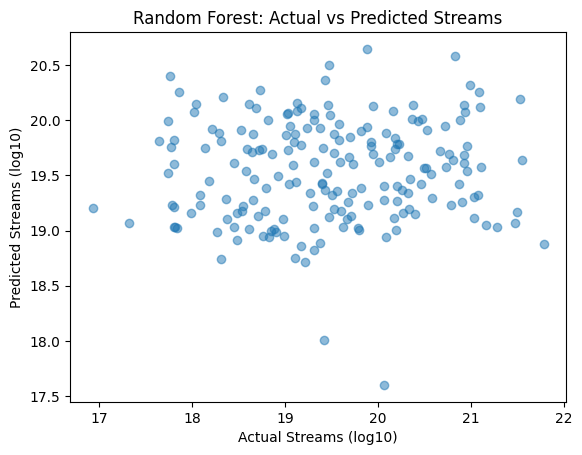

In [42]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Streams (log10)")
plt.ylabel("Predicted Streams (log10)")
plt.title("Random Forest: Actual vs Predicted Streams")
plt.show()

### Random Forest Feature Importance

This table ranks the **relative importance of each audio feature** in predicting log-transformed streams:  

- **Valence %** appears as the most influential feature, followed closely by **Danceability %**, then **Energy %** and **Acousticness %**.  
- The differences in importance scores are **moderate**, suggesting that no single feature dominates the model’s predictions.  
- Despite these rankings, the overall **negative R²** indicates that even the most important features provide **minimal predictive power** for actual streaming numbers.  

This reinforces the idea that **audio characteristics alone do not strongly drive streaming success** in 2023, at least within the scope of this dataset.

In [43]:
feat_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
})
feat_importances = feat_importances.sort_values(by="Importance", ascending=False)
feat_importances

,Feature,Importance
1,Valence %,0.292028
0,Danceability %,0.265175
2,Energy %,0.227667
3,Acousticness %,0.215129


### Feature Importance Visualization: Random Forest (Without Track Age)

This horizontal bar chart visualizes the **importance scores of each audio feature** as computed by the Random Forest model:  

- **Valence %** is the top contributor to predictions, followed by **Danceability %**, **Energy %**, and **Acousticness %**.  
- The **relatively close importance scores** indicate that all features provide some predictive signal, but none dominates substantially.  
- The visual emphasis on Valence % highlights that **tracks with higher or lower valence levels** slightly influence predicted streaming counts more than the other audio attributes.  
- Despite the model ranking features, the **negative R²** from earlier indicates that **even the most important features fail to accurately predict actual streams**, confirming the weak explanatory power of these audio features alone.  

This chart provides a **clear comparative view** of feature relevance, useful for understanding the model’s internal logic and for future feature engineering or analysis.

In [44]:
px.bar(
    feat_importances,
    x="Importance",
    y="Feature",
    orientation="h",
    title="Feature Importance in Random Forest",
    labels={"Importance": "Importance Score", "Feature": "Audio Features"},
    color="Importance",
    color_continuous_scale="Blues"
)


![Track Age vs Streams](screenshots/feature-importance-in-random-forest.png)


### Linear Regression Model Initialization

At this stage, a **Linear Regression model** is initialized to serve as a **baseline predictive model**.  

Key points:  
- Linear Regression assumes a **linear relationship** between input features (`Danceability %`, `Valence %`, `Energy %`, `Acousticness %`) and the target variable (`Streams`).  
- Unlike Random Forest, this model will provide **coefficients for each feature**, giving insights into the **direction and strength** of the relationship.  
- The initialization does **not yet fit the model**; it simply prepares the algorithm to learn from the scaled training data.  

This step is foundational before training, evaluation, and interpreting **feature impact on predicted streams**.

In [45]:
lr = LinearRegression()

### Fitting the Linear Regression Model

Here, the Linear Regression model is **trained on the scaled training data** (`X_train_scaled` and `y_train`).  

Key points:  
- The model learns **coefficients for each feature**, capturing how changes in `Danceability %`, `Valence %`, `Energy %`, and `Acousticness %` affect `Streams` (log-transformed).  
- Unlike Random Forest, this model assumes a **linear relationship**, so it is sensitive to outliers and cannot capture complex non-linear patterns.  
- After fitting, the model is ready to **predict streams on unseen test data** and to **analyze feature coefficients** for interpretability.  

This step finalizes the model’s internal parameters, allowing evaluation of its **predictive performance and feature influence**.


In [46]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

### Generating Predictions with Linear Regression

The trained Linear Regression model is used to **predict the log-transformed streams** for the test dataset (`X_test_scaled`).  

Key observations:  
- These predictions represent the model’s **best estimate of each track’s performance** based on its audio features.  
- Since the target variable is **log-transformed**, the predicted values are in the same logarithmic scale as the training data.  
- These predictions will be compared to the actual log-stream values to **assess model accuracy** using metrics like R² and RMSE.  
- This step is essential for evaluating **how well the linear relationships captured by the model generalize** to unseen data.


In [47]:
y_pred_lr = lr.predict(X_test_scaled)

### Linear Regression Model Evaluation

The Linear Regression model achieves the following performance metrics on the test set:  

- **R²: 0.016**  
- **RMSE: 1.006**  

Insights from these results:  
- The **R² value close to zero** indicates that the linear model explains **very little of the variance** in Spotify streams based on the audio features alone.  
- The **RMSE value** shows the average magnitude of error in predicting log-transformed streams, suggesting the predictions deviate **significantly from actual values**.  
- These metrics imply that a **simple linear combination of danceability, valence, energy, and acousticness** is insufficient to predict track popularity in 2023.  
- While the model captures **some minimal trends**, the overall predictive power is extremely limited, signaling that **other factors beyond these audio features** likely drive streaming success.


In [48]:
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression R²: {r2_lr:.3f}")
print(f"Linear Regression RMSE: {rmse_lr:.3f}")

Linear Regression R²: 0.016
Linear Regression RMSE: 1.006


### Linear Regression: Actual vs Predicted Streams Scatter Plot

This scatter plot visualizes the **relationship between the actual and predicted log-transformed streams** for the Linear Regression model.  

Key observations:  

- The points are **widely dispersed around the diagonal**, confirming the **poor fit** indicated by the low R² value.  
- There is **no clear linear trend**, which means the model struggles to capture the variation in track popularity based solely on the selected audio features.  
- Outliers with extremely high streams, such as **viral hits**, are notably **underestimated**, highlighting the model's inability to handle tracks with exceptional performance.  
- The visualization reinforces that **a linear approach is insufficient**, suggesting that **non-linear or more complex models** might be needed to capture the dynamics of Spotify streaming data.


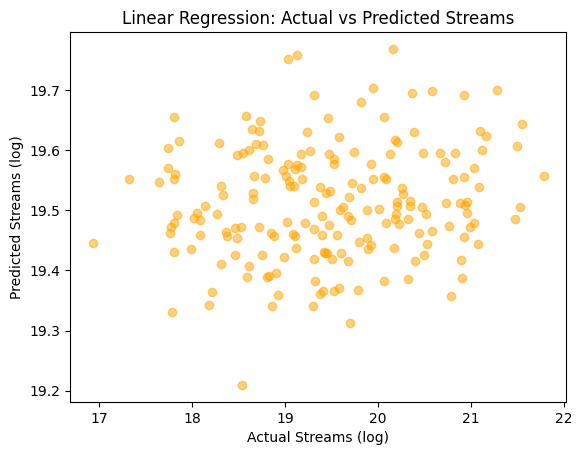

In [49]:
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="orange")
plt.xlabel("Actual Streams (log)")
plt.ylabel("Predicted Streams (log)")
plt.title("Linear Regression: Actual vs Predicted Streams")
plt.show()

### Linear Regression Feature Coefficients

This table and bar chart present the **coefficients assigned to each audio feature** by the Linear Regression model.  

Key insights:  

- **Danceability %** has the **largest negative coefficient**, suggesting that higher danceability is slightly associated with lower predicted streams in this model.  
- **Valence %** has a **small positive coefficient**, indicating a minimal positive effect on predicted streams.  
- **Energy %** and **Acousticness %** also show **small negative contributions**, further emphasizing the **weak linear relationship** between these audio features and track popularity.  
- Overall, the **low magnitude of all coefficients** aligns with the model’s **poor predictive performance**, as confirmed by the R² value near zero.  

This analysis highlights that **linear assumptions do not capture the true impact of audio features** on Spotify streams, motivating the exploration of **more flexible, non-linear models**.


In [50]:
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})
coeffs = coeffs.sort_values(by="Coefficient", ascending=False)
coeffs

,Feature,Coefficient
1,Valence %,0.035784
2,Energy %,-0.066193
3,Acousticness %,-0.078969
0,Danceability %,-0.091625


### Linear Regression Feature Coefficients Visualization

This horizontal bar chart illustrates the **magnitude and direction of influence** for each audio feature according to the Linear Regression model:

- **Danceability %** shows the **strongest negative effect**, suggesting that tracks with higher danceability slightly predict lower streams in this linear framework.  
- **Acousticness %** and **Energy %** also exhibit **negative associations**, but their impact is moderate.  
- **Valence %** is the only feature with a **positive coefficient**, indicating a minor positive influence on predicted streams.  
- The overall small coefficient values **reinforce the weak linear relationship** between these audio features and actual Spotify streams, consistent with the low R² score observed.  

This visualization clarifies how **linear models fail to capture complex patterns**, guiding future analysis toward more sophisticated or non-linear approaches for modeling track popularity.


In [51]:
px.bar(
    coeffs,
    x="Coefficient",
    y="Feature",
    orientation="h",
    title="Feature Coefficient in Linear Regression",
    labels={"Coefficient": "Coefficient Score", "Feature": "Audio Features"},
    color="Coefficient",
    color_continuous_scale="Greens"
)


![Track Age vs Streams](screenshots/feature-coefficient-in-linear-regression.png)


### Machine Learning Models Summary: Random Forest vs Linear Regression

This section provides a comparative overview of the two regression models applied to predict Spotify streams based on audio features:

- **Random Forest Regressor**  
  - R²: **-0.152**, RMSE: **1.088**  
  - Feature importances indicate that **Valence %** and **Danceability %** are slightly more influential than **Energy %** or **Acousticness %**.  
  - Despite its ability to capture non-linear relationships, the model **performs poorly**, suggesting that **audio features alone are insufficient** to predict streams.  

- **Linear Regression**  
  - R²: **0.016**, RMSE: **1.006**  
  - Coefficients show that only **Valence %** has a small positive effect, while **Danceability %, Energy %, and Acousticness %** have negative associations.  
  - The extremely low R² confirms that **linear assumptions do not capture the complex factors** influencing streaming performance.  

**Key Insights on Model Performance**:  
- Both models highlight the **limited predictive power of intrinsic audio features** for streaming success in 2023.  
- **External factors likely dominate track popularity**, including:  
  - **Marketing campaigns, playlist placements, and promotional activities**  
  - **Viral trends on social media platforms like TikTok**  
  - **Seasonal or cultural influences** that drive short-term spikes in streaming  
- The **absence of these variables** in the dataset explains why models cannot effectively forecast streams.  

**Conclusion**:  
- Audio features provide some information about song characteristics but are **not strong determinants of commercial success**.  
- To enhance predictive performance, future models should incorporate **external engagement metrics, marketing data, and social trends**, which have a far greater impact on Spotify streams than the track's acoustic profile alone.


---

### Project Summary and Key Insights

This project explored Spotify 2023 data to analyze trends in track popularity, artist performance, and the influence of audio features on streaming success. Below is a consolidated summary of the key findings:

#### **1. Track Age and Streaming Performance**
- Most streams are dominated by **recent releases**, but some older tracks still maintain high streaming numbers.  
- Tracks released in the last **5–6 years** capture the majority of streams, emphasizing the **recency effect** in digital music consumption.  
- Older classics can still achieve notable streams, but these are **exceptions rather than the rule**.

#### **2. Solo vs Collaboration Tracks**
- **Solo tracks** represent a larger portion of the dataset (~61%), but **collaborations** (~38%) frequently appear among top-streamed tracks.  
- Collaborations can leverage fanbases from multiple artists, often leading to **higher streaming potential**.

#### **3. Top Artists and Tracks**
- **Top artists** such as The Weeknd, Taylor Swift, and Ed Sheeran dominate cumulative streams, highlighting the **power of established fanbases and global reach**.  
- **Top tracks** are mostly recent hits, but some iconic songs like “Blinding Lights” maintain longevity in streaming numbers.  
- High-stream tracks often correlate with **high visibility and viral trends**, rather than purely audio characteristics.

#### **4. Audio Feature Analysis**
- **Danceability, Valence, Energy, and Acousticness** show varying relationships with streams:  
  - Top danceable tracks are not always the most streamed.  
  - High valence (positivity) sometimes aligns with higher streams, but not consistently.  
  - Energy and acousticness have **weak correlations** with streams.  
- Histograms reveal that **streams are not strongly dependent** on any single audio feature, implying that **other external factors** drive popularity.

#### **5. Correlation Insights**
- Weak correlations were observed between streams and audio features:  
  - **Danceability %:** slightly negative with streams  
  - **Valence %:** minimal positive correlation  
  - **Energy % and Acousticness %:** negligible to negative correlation  
- Indicates that **audio features alone cannot predict streaming success**.

#### **6. Machine Learning Models**
- Both **Random Forest** and **Linear Regression** struggled to predict streams (R² near zero or negative).  
- **Key takeaway:**  
  - Streams are influenced by **external factors** such as marketing, playlist placement, virality on social media, and seasonal trends.  
  - Audio features provide limited predictive power, highlighting the **importance of real-world engagement metrics**.

### **Overall Lessons Learned**
- Streaming success is **multi-faceted**, heavily influenced by **artist reputation, promotions, and cultural trends**, rather than just musical characteristics.  
- Visualizations effectively illustrate patterns in **artist dominance, track longevity, and feature distribution**, but predictive modeling requires **additional contextual data**.  
- For future projects, combining **audio analysis with marketing, social media, and engagement metrics** will offer **more accurate insights and predictions**.

This project demonstrates how **data-driven analysis can reveal both measurable trends and the limitations of prediction** in the complex ecosystem of digital music streaming.
